### Clustering: k-means and linkage-based clustering

In this notebook we are going to practice with the k-means and the linkage-based (called "agglomerative" in sklearn) clustering algorithms.

In particular you are going to implement the k-means algorithm from scratch and to compare the results with the implementation already present in the sklearn library.

In [1]:
#load the required packages
%matplotlib inline  

import numpy as np
import scipy as sp
import imageio as imio
import matplotlib.pyplot as plt

import sklearn
from sklearn.datasets.samples_generator import make_blobs
from sklearn.cluster import KMeans
from sklearn.datasets import load_sample_image
from skimage import data, color
from skimage.transform import rescale, resize, downscale_local_mean

from mpl_toolkits.mplot3d import Axes3D #3d plotting functions
from matplotlib import pyplot
from PIL import Image

from copy import deepcopy  #deepcopy ensures that a copy of all the object data is performed (not just the pointers)

## TO DO:
    
Place your ID number in the ID variable, it will be used as random seed (as usual the random seed can affect a little bit the results)

In [2]:
# fix your ID ("numero di matricola") and the seed for random generator
ID = 1205687  #insert your ID number here
np.random.seed(ID)

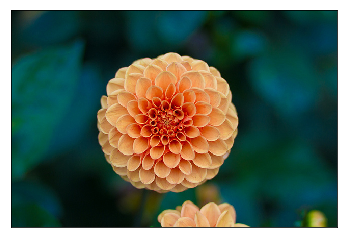

Flower image:  (427, 640, 3)


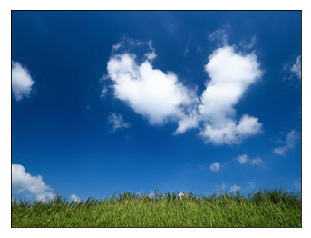

Landscape image:  (240, 320, 3)


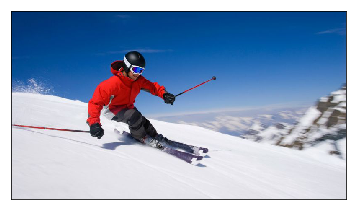

Skiing image:  (451, 800, 3)


In [3]:
# load the images and display them
flower = load_sample_image('flower.jpg')
landscape = imio.imread("data/landscape.jpg")
skiing = imio.imread("data/skiing.jpg")

ax = plt.axes(xticks=[], yticks=[])
ax.imshow(flower)
plt.show()
print("Flower image: ",flower.shape)

ax2 = plt.axes(xticks=[], yticks=[])
ax2.imshow(landscape)
plt.show()
print("Landscape image: ",landscape.shape)

ax3 = plt.axes(xticks=[], yticks=[])
ax3.imshow(skiing)
plt.show()
print("Skiing image: ",skiing.shape)

We are going to start by using the flower image. It will be rescaled of a factor 8 to speed up the computation.


(53, 80, 3)


C:\ProgramData\Anaconda3\lib\site-packages\skimage\transform\_warps.py:105: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "


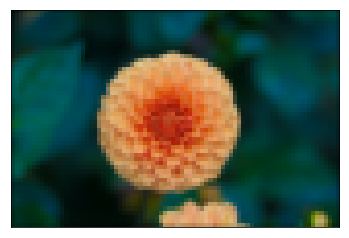

In [4]:
# Rescale the image of a factor of 8
# The anti-aliasing can be enabled for better performances but requires a recent version of the python packages

flower_rescaled = rescale(flower, 1.0 / 8.0, anti_aliasing=True, multichannel=True) #new versions
#flower_rescaled = rescale(flower, 1.0 / 8.0)  # better compatibility

# Firstly, we are going to visualize the rescaled version
print(flower_rescaled.shape)
ax = plt.axes(xticks=[], yticks=[])
ax.imshow(flower_rescaled);

In [5]:
# reshape the data to a matrix of num_pixels x 3

data_rescaled = flower_rescaled.reshape(flower_rescaled.shape[0]*flower_rescaled.shape[1], 3)

print(data_rescaled.shape)
print(data_rescaled)

(4240, 3)
[[0.01672216 0.06389197 0.0491306 ]
 [0.0491306  0.10022198 0.08061413]
 [0.10714021 0.14739179 0.12282649]
 ...
 [0.16204218 0.25049945 0.04716981]
 [0.02156863 0.15719571 0.06481687]
 [0.01176471 0.12963374 0.06677765]]


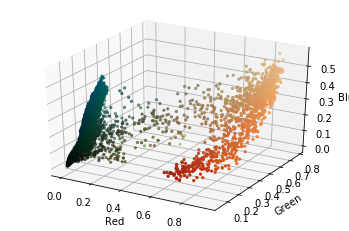

In [6]:
# Plot the points in the 3-dimensional space with normalized intervals between 0 and 1
# (corresponding to the three channels of the image, i.e. Red Green and Blue)



fig = pyplot.figure()
axis = fig.add_subplot(1, 1, 1, projection="3d")
r, g, b = list(data_rescaled[:,0]), list(data_rescaled[:,1]), list(data_rescaled[:,2])

axis.scatter(r, g, b, c=data_rescaled, s=5, marker="o")
axis.set_xlabel("Red")
axis.set_ylabel("Green")
axis.set_zlabel("Blue")
pyplot.show()

## TO DO 1
Implement the k-means algorithm manually (do not use the kmeans function of sklearn). The inputs to the function is the set of vectors to be clustered and the number of clusters. The output must contain the clusters barycenters, a vector associating each data point to the corresponding cluster and the error at each iteration.
Additionally, fix a maximum number of iterations of the k-means algorithm (e.g., 50).

In [7]:
def my_kmeans(points, k):
    max_iters=50
    
    #ADD YOUR CODE HERE
    centroids = np.random.random(size=(k,points.shape[1])) # k centroids random initialization in the 3-dimensional space
    iters     = 0
    clusters  = np.empty(points.shape[0], dtype=int) # vector of labels associating each point to a cluster
    error     = np.empty(max_iters)
    while iters < max_iters:
        
        for j,point in enumerate(points): #loop over each point
            distance = np.empty(k)
            for i in range(k): # compute the distances for each point from every centroids
                distance[i] = np.linalg.norm(centroids[i,:] - point)
            clusters[j] = np.argmin(distance)  # assign the closest cluster label to the point
            
        sum_err = 0 # summation for the error
        for i in range(k): # recompute new centroids for each cluster
            Ci = points[clusters == i,:] # select points belonging to cluster C_i, where i is the cluster label
            centroids[i,:] = Ci.sum(axis=0) / Ci.shape[0] # barycenter
            
            # compute error made by approximating the points with the cluster centers
            for xi in Ci:
                sum_err += np.linalg.norm(xi - centroids[i])**2 
        
        error[iters] = sum_err
        iters += 1
    
    return centroids, clusters, error


## TO DO 2:

Now try the function you developed on the flower image with two clusters (k=2). 

Then plot the data points in the 3-dimensional space, each point must be coloured based on the membership to one or the other cluster. Additionally, plot the respective clusters centroids (use a different shape, size or color to highlight the centroids).

In [8]:
mykmeans_centers,clusters,error = my_kmeans(data_rescaled,2) #ADD YOUR CODE HERE

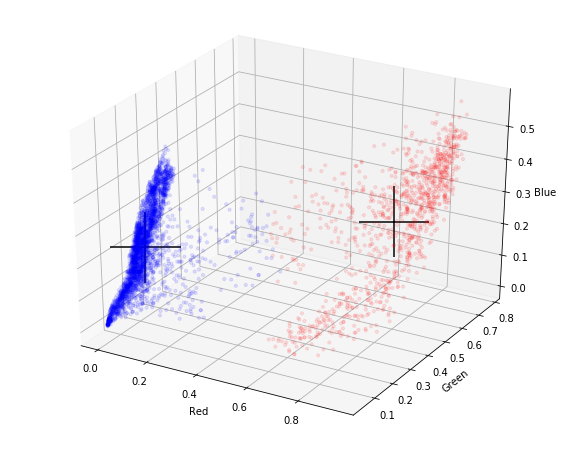

In [9]:
#ADD CODE FOR PLOTTING HERE
fig = pyplot.figure(figsize=(10,8))
axis = fig.add_subplot(1, 1, 1, projection="3d")
r, g, b = list(data_rescaled[:,0]), list(data_rescaled[:,1]), list(data_rescaled[:,2])

axis.scatter(r, g, b, c=clusters,cmap='bwr', s=10, marker="o", alpha=0.1)
axis.scatter(list(mykmeans_centers[:,0]),list(mykmeans_centers[:,1]),list(mykmeans_centers[:,2]), alpha=1,c='black', s=5000, marker="+")
axis.set_xlabel("Red")
axis.set_ylabel("Green")
axis.set_zlabel("Blue")
pyplot.show()

## TO DO 3: 
Plot the value of the error versus the number of iterations

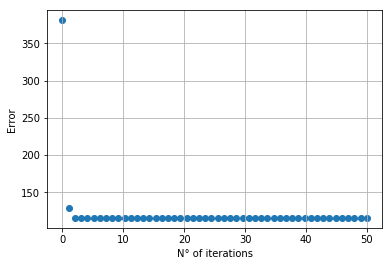

In [10]:
#ADD CODE FOR PLOTTING HERE
xax = np.linspace(0,50)
plt.scatter(xax,error)
plt.grid(True)
plt.xlabel("N° of iterations")
plt.ylabel("Error")
plt.show()

## TO DO 4:
Now use the k-means function provided in sklearn. Pass to the function the number of clusters and use multiple random initializations (n_init parameter). Go to the documentation page for further details

In [11]:
kmeans = KMeans(n_clusters=2,init='random',n_init=15,max_iter=50,random_state=ID,verbose=1,n_jobs=-1)

#ADD YOR CODE

kmeans.fit(data_rescaled)

Initialization complete
start iteration
done sorting
end inner loop
Iteration 0, inertia 116.02907043347732
start iteration
done sorting
end inner loop
Iteration 1, inertia 115.7017151532823
center shift 1.902525e-03 within tolerance 5.194488e-06
Initialization complete
start iteration
done sorting
end inner loop
Iteration 0, inertia 537.262666971223
start iteration
done sorting
end inner loop
Iteration 1, inertia 123.4499606726447
start iteration
done sorting
end inner loop
Iteration 2, inertia 115.73908713845647
start iteration
done sorting
end inner loop
Iteration 3, inertia 115.7017151532823
center shift 1.606026e-03 within tolerance 5.194488e-06
Initialization complete
start iteration
done sorting
end inner loop
Iteration 0, inertia 489.51729516463035
start iteration
done sorting
end inner loop
Iteration 1, inertia 122.98356910448075
start iteration
done sorting
end inner loop
Iteration 2, inertia 115.81754754996406
start iteration
done sorting
end inner loop
Iteration 3, inertia 

KMeans(algorithm='auto', copy_x=True, init='random', max_iter=50,
    n_clusters=2, n_init=15, n_jobs=-1, precompute_distances='auto',
    random_state=1205687, tol=0.0001, verbose=1)

## TO DO 5:
Perform the same plot as above but with the output of the k-means function provided in sklearn.

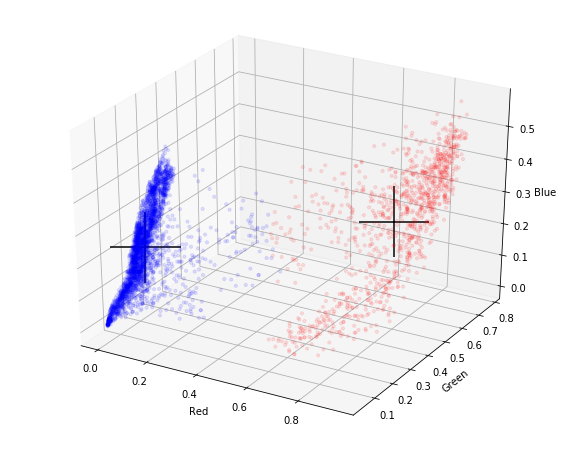

In [12]:
#ADD CODE FOR PLOTTING HERE

centers,clusters,error = kmeans.cluster_centers_,kmeans.labels_,kmeans.inertia_

fig = pyplot.figure(figsize=(10,8))
axis = fig.add_subplot(1, 1, 1, projection="3d")
r, g, b = list(data_rescaled[:,0]), list(data_rescaled[:,1]), list(data_rescaled[:,2])

axis.scatter(r, g, b, c=clusters,cmap='bwr', s=10, marker="o", alpha=0.1)
axis.scatter(list(centers[:,0]),list(centers[:,1]),list(centers[:,2]), alpha=1,c='black', s=5000, marker="+")
axis.set_xlabel("Red")
axis.set_ylabel("Green")
axis.set_zlabel("Blue")
pyplot.show()

## Question 1: 

Compare the results obtained with your implementation and with k-means from sklearn. Do you observe any differences, i.e., do the two plot matches? 

**Answer:** The two plots are quite alike. At first glance I could not find any difference between the two main clusters (blue and red in plots) and the centroids are just slightly shifted. So my implementation, even if it is slower, produces good final results.

## TO DO 6:

Now display the segmented image based on the two clusters found above with the k-means functions by sklearn. Notice that for proper visualization you need to reshape the array back to the original 2D image size

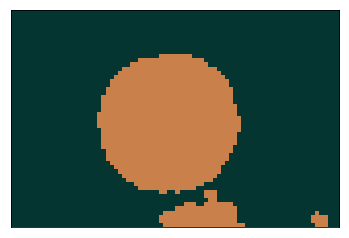

In [13]:
#ADD YOUR CODE HERE
from matplotlib import colors
data = clusters.reshape(flower_rescaled.shape[0],flower_rescaled.shape[1])
ax = plt.axes(xticks=[], yticks=[])
ax.imshow(data,cmap=colors.ListedColormap([list(centers[0,:]), list(centers[1,:])])) # plotting with colors given by the centroids
plt.show()

## Question 2: 

What do you observe? Do you think clustering could be useful for image segmentation ? And for image compression? Comment your answer.

**Answer:** I can tell that the original orange flower has been discerned correctly from the greenish background, so clustering can be useful for image segmentation, provided that the number k of clusters is known beforehand. This could be also useful for image compression, in fact all the pixels in a cluster have just one averaged color, meaning that less information is required to store the clustered image.

## TO DO 7:

Now perform again the clustering with the non-rescaled image, using the method provided by sklearn. Plot again: the 3-dimensional points, the 3-dimensional points with color based on membership, the segmented image.

(427, 640, 3)
(273280, 3)


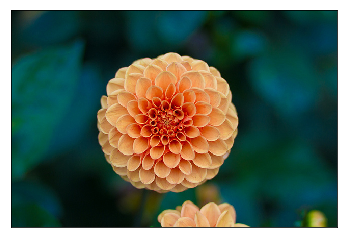

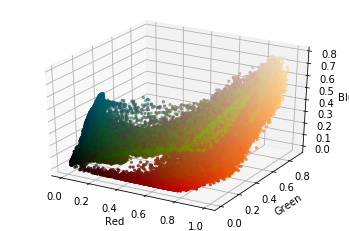

In [14]:
ax = plt.axes(xticks=[], yticks=[])
ax.imshow(flower);
print(flower.shape)

data = flower.reshape(flower.shape[0]*flower.shape[1], 3)
data=data/255.0
print(data.shape)


fig = pyplot.figure()
axis = fig.add_subplot(1, 1, 1, projection="3d") # 3D plot with scalar values in each axis

r, g, b = list(data[:,0]), list(data[:,1]), list(data[:,2])


axis.scatter(r, g, b, c=data, s=5, marker="o")
axis.set_xlabel("Red")
axis.set_ylabel("Green")
axis.set_zlabel("Blue")
pyplot.show()

#ADD YOUR CODE HERE

Initialization complete
start iteration
done sorting
end inner loop
Iteration 0, inertia 9077.47618041438
start iteration
done sorting
end inner loop
Iteration 1, inertia 9064.420123263231
start iteration
done sorting
end inner loop
Iteration 2, inertia 9064.221485177015
center shift 7.682879e-04 within tolerance 5.689591e-06
Initialization complete
start iteration
done sorting
end inner loop
Iteration 0, inertia 37295.89005428759
start iteration
done sorting
end inner loop
Iteration 1, inertia 9980.61988454927
start iteration
done sorting
end inner loop
Iteration 2, inertia 9077.029129189088
start iteration
done sorting
end inner loop
Iteration 3, inertia 9064.560633786838
start iteration
done sorting
end inner loop
Iteration 4, inertia 9064.217006977458
center shift 9.190203e-04 within tolerance 5.689591e-06
Initialization complete
start iteration
done sorting
end inner loop
Iteration 0, inertia 9072.550544201571
start iteration
done sorting
end inner loop
Iteration 1, inertia 9064.3

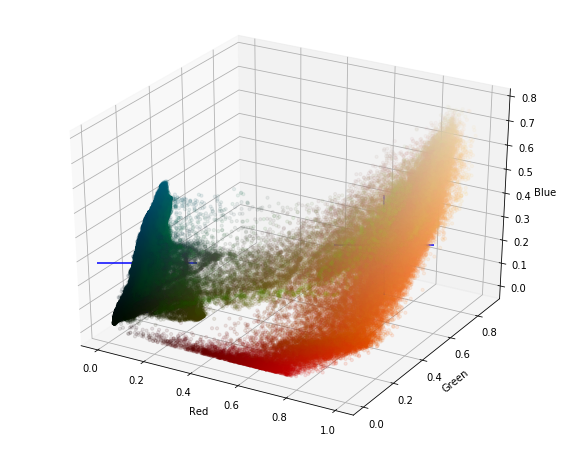

In [15]:
kmeans_original = KMeans(n_clusters=2,init='random',n_init=15,max_iter=50,random_state=ID,verbose=1,n_jobs=-1)
kmeans_original.fit(data)

centers,clusters,error = kmeans_original.cluster_centers_,kmeans_original.labels_,kmeans_original.inertia_

fig = pyplot.figure(figsize=(10,8))
axis = fig.add_subplot(1, 1, 1, projection="3d")

axis.scatter(r, g, b, c=data, s=10,alpha=0.1, marker="o")
axis.scatter(list(centers[:,0]),list(centers[:,1]),list(centers[:,2]), alpha=1,c='blue', s=10000, marker="+")
axis.set_xlabel("Red")
axis.set_ylabel("Green")
axis.set_zlabel("Blue")
pyplot.show()

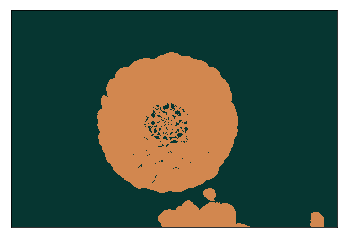

In [16]:
data_original = clusters.reshape(flower.shape[0],flower.shape[1])
ax = plt.axes(xticks=[], yticks=[])
ax.imshow(data_original,cmap=colors.ListedColormap([list(centers[0,:]), list(centers[1,:])])) # plotting with colors given by the centroids
plt.show()

## Question 3: explain what do you observe

**Answer:** With more data from the original image (and more computing time) the final result is better: both the edges of the flowers and the darker spots in the inner part are clearer discerned. Maybe in this case this can be also an issue since if one considers the darker cluster as "background", the inner part of the main subject is wrongly classified.

## TO DO 8:

Now load the landscape image (optional: try also with the skiing image), resize of a factor of 8 and segment it using kmeans with k varying from 2 to 15 clusters. You can use the sklearn implementation.

Then plot the resulting data points in the 3-dimensional space, each point must be colored based on the cluster membership. 
Additionally, plot the respective clusters centroids.



(1200, 3)


C:\ProgramData\Anaconda3\lib\site-packages\skimage\transform\_warps.py:105: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "


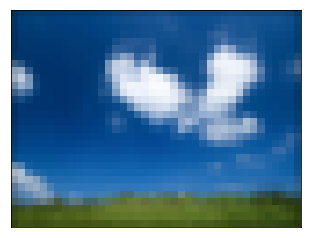

In [17]:
landscape_rescaled = rescale(landscape, 1.0 / 8.0, anti_aliasing=True, multichannel=True)
data_rescaled = landscape_rescaled.reshape(landscape_rescaled.shape[0]*landscape_rescaled.shape[1], 3)
print(data_rescaled.shape)

ax = plt.axes(xticks=[], yticks=[])
ax.imshow(landscape_rescaled);
#ADD YOUR CODE HERE

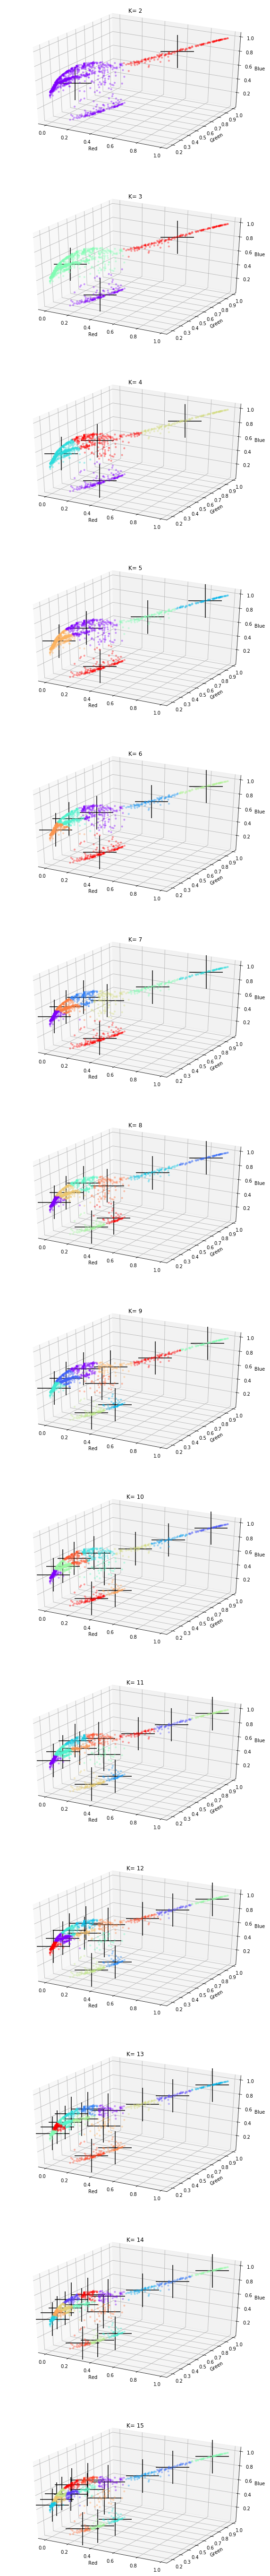

In [18]:
error = np.array([])
fig = pyplot.figure(figsize=(10,100))
r, g, b = list(data_rescaled[:,0]), list(data_rescaled[:,1]), list(data_rescaled[:,2])
for k in range(2,16):
    kmeans = KMeans(n_clusters=k,init='random',n_init=15,max_iter=50,random_state=ID,n_jobs=-1)
    kmeans.fit(data_rescaled)

    centers,clusters,error = kmeans.cluster_centers_,kmeans.labels_,np.append(error,kmeans.inertia_)

    axis = fig.add_subplot(14, 1, k-1, projection="3d")

    axis.scatter(r, g, b, c=clusters,cmap='rainbow', s=10, marker="o", alpha=0.3)
    axis.scatter(list(centers[:,0]),list(centers[:,1]),list(centers[:,2]), alpha=1,c='black', s=5000, marker="+")
    axis.set_xlabel("Red")
    axis.set_ylabel("Green")
    axis.set_zlabel("Blue")
    axis.set_title("K= "+str(k))
pyplot.show()

## TO DO 9:

Plot for different values of k (e.g. k in range(2,15)) the respective error of the kmeans algorithm 

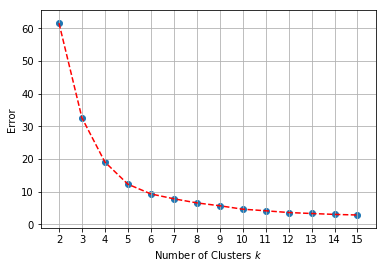

In [19]:
#ADD CODE FOR PLOTTING HERE
ks = range(2,16)
plt.plot(ks,error,'r--')
plt.scatter(ks,error)
plt.grid(True)
plt.xlabel("Number of Clusters $k$")
plt.ylabel("Error")
plt.xticks(ks)
plt.show()

A possible way to exploit the error curve in order to set the number of clusters is to apply the "Elbow rule", explained below: 

(explanation from Wikipedia)

The Elbow method is a method of interpretation and validation of consistency within cluster analysis designed to help finding the appropriate number of clusters in a dataset.

This method looks at the percentage of variance explained as a function of the number of clusters: One should choose a number of clusters so that adding another cluster doesn't give much better modeling of the data. More precisely, if one plots the percentage of variance explained by the clusters against the number of clusters, the first clusters will add much information (explain a lot of variance), but at some point the marginal gain will drop, giving an angle in the graph. The number of clusters is chosen at this point, hence the "elbow criterion". This "elbow" cannot always be unambiguously identified. Percentage of variance explained is the ratio of the between-group variance to the total variance, also known as an F-test. A slight variation of this method plots the curvature of the within group variance.

##  Question 4:

Compare the results with different values of k, what do you observe? 

Analyze also the error, which one do you think is the optimal value of k ?

Is there a single, clear answer ? 

Which value of k would you choose by applying the "Elbow rule"? Explain why.

**Answer:** By definition the error is the sum of squared distances of samples to their closest cluster center, so more clusters lead to smaller errors, as it is correctly shown in the plot. In my guess I would choose $k=5$ clusters, since in the plot it is the last point of rapidly decreasing slope and thereafter the gain is smaller, thus it is consistent with the "Elbow rule". There is not a single answer though, and one should take into account the colors too. For instance, for the landscape $k=3$ could be enough to segment the white clouds, the blue sky and the green field.

## Linkage-based clustering

The second part of the assignment concern instead linkage-based clustering. We will use the AgglomerativeClustering module of sklearn. 

In [20]:
# Import required packages
from sklearn.cluster import AgglomerativeClustering
from sklearn import metrics, datasets
from sklearn.datasets.samples_generator import make_blobs
from sklearn.preprocessing import StandardScaler


# Load sample data
data = np.load('data/circle_data.npz')
X = data['X']
labels_true = data['labels_true']

## TO DO 10: 

Now exploit the AgglomerativeClustering algorithm on the provided sample data points. Use the "single" linkage type that correspond to the minimum distance criteria seen in the lectures and 2 clusters. Notice that the "single" option has been introduced recently in sklearn, if you get an error ensure you have a recent version of the library. Plot the resulting clustering.

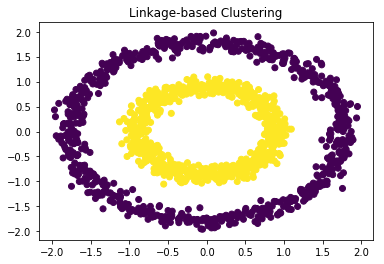

In [21]:
# Compute Agglomerative Clustering

ac = AgglomerativeClustering(n_clusters=2,linkage="single")
#ADD YOUR CODE
ac.fit(X)
    
# Plot result

#ADD CODE FOR PLOTTING HERE
plt.scatter(X[:,0],X[:,1],c=ac.labels_)
plt.title("Linkage-based Clustering")
plt.show()

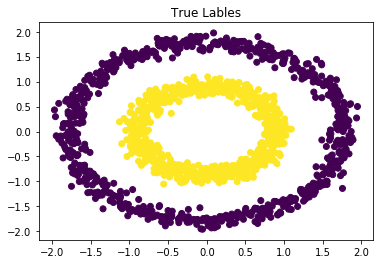

In [22]:
plt.scatter(X[:,0],X[:,1],c=labels_true) # True Labels
plt.title("True Lables")
plt.show()

## TO DO 11: 

Now try the KMeans with two clusters on the same dataset we used for the AgglomerativeClustering algorithm.

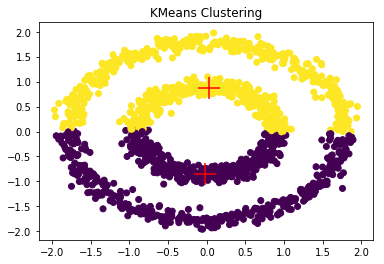

In [23]:
#ADD YOUR CODE HERE
kmeans = KMeans(n_clusters=2,init='random',n_init=1,max_iter=50,random_state=ID,n_jobs=-1) # just pick 1 random initialization
kmeans.fit(X)

plt.scatter(X[:,0],X[:,1],c=kmeans.labels_)
plt.scatter(list(kmeans.cluster_centers_[:,0]),list(kmeans.cluster_centers_[:,1]), alpha=1,c='red', s=500, marker="+")
plt.title("KMeans Clustering")
plt.show()

## Question 5:

Compare the results of K-means and Agglomerative Clustering and explain what you observe



**Answer:** The two techniques lead to very different results. Due to this peculiar data points spatial configuration, only the linkage-based method is able to reproduce perfectly the true labels, whereas the KMeans cannot discern the inner and outer circles and its clusters centers are just the points with the minimum square distance relative to the samples. Moreover, there is a huge dependency on the number of initializations (_n_init_) and on the seed for the first clusters centers random assignment (_random state_).